# 범주형 독립변수
- 범주형 독립변수를 가지는 경우의 회귀분석모형

## 1. 범주형 독립변수가 한 개인 경우
- D개의 독립변수를 갖는 선형회귀모형
    - $\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D$
- x1이 범주형 독립변수이고, 두 개의 값을 갖는다면 : A or B, 두 가지의 모델이 필요하다.
    - model A : $\hat{y} = w_{A, 0}+ w_{A, 1}x_{A, 1} + w_{A, 2}x_{A, 2} + \cdots + w_{A, D}x_{A, D}$
    - model B : $\hat{y} = w_{A, 0}+ w_{A, 1}x_{A, 1} + w_{A, 2}x_{A, 2} + \cdots + w_{A, D}x_{A, D}$
- x1이 A일때와 B일때의 모형이 있어야하고 두 모형의 가중치가 달라진다.
- 그런데 가중치는 독립변수 x2가 변할 때 y값이 변하는 정도를 의미하므로, x2의 가중치 w2는 x1의 값에 따라 변하면 안된다.
- 이러한 문제를 해결하기 위해서 범주형 독립변수 x1을 더미변수화 한다. 범주값의 갯수만큼 더미변수를 생성한다.
    - 더미변수는 상수항을 포함하므로 더미변수화하면 상수항은 없어진다.
    - $\hat{y} = w_{1A}d_{1A} + w_{1B}d_{1B} + w_2x_2 + \cdots + w_Dx_D$
    - w_1x_1이 A, B 더미변수로 나누어짐
    
    
## 2. 풀랭크 방식
- `풀랭크 full-rank` : 더미변수의 값을 원핫인코딩(one-hot-encoding) 방식으로 지정한다.
    - 범주형 독립변수의 범주값마다 더미변수를 1과 0으로 나타낸다.
    - x1 = A ---> d1A = 1, d1B = 0 / x1 = B ---> d1A = 0, d1B = 1
- 이러한 값을 위의 식에 대입하면
    - $x_1 = A \rightarrow \hat{y} = w_{1A} + w_2x_2 + \cdots + w_Dx_D$
    - $x_1 = B \rightarrow \hat{y} = w_{1B} + w_2x_2 + \cdots + w_Dx_D$
    - 범주값에 따라 더미변수의 값이 1이므로 해당 가중치만 남는다.
    - **두 경우의 직선의 기울기는 같다.**
- x1이 A일때와 B일때 각각 다른 모형을 사용하지만, 다른 독립변수들의 가중치가 그대로이다. 범주형 독립변수의 가중치만 바뀌게 된다.
- **선형회귀모형에 범주형 독립변수가 있다면 더미변수의 가중치 이외에 별도의 상수항이 있으면 안된다. 상수항과 더미변수의 가중치항을 분리할 수 없기때문**

## 3. 축소랭크 방식
- `축소랭크 reduced-rank` : 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1로 놓는 방식
- x1 = A가 기준값인 경우
    - x1 = A ---> d1A = 1, d1B = 0 / x1 = B ---> d1A = 1, d1B = 1 (d1A는 항상 1)
- x1 = B가 기준값인 경우
    - x1 = A ---> d1A = 0, d1B = 1 / x1 = B ---> d1A = 0, d1B = 1 (d1B는 항상 1)
- 선형회귀 모형에 대입하면
    - $x_1 = A \rightarrow \hat{y} = w_{1A} + w_2x_2 + \cdots + w_Dx_D$
    - $x_1 = B \rightarrow \hat{y} = w_{1A} + w_{1B} + w_2x_2 + \cdots + w_Dx_D$
    - **두 경우의 직선의 기울기는 같다.**
    
## 4. 두 개 이상의 범주형 변수가 있는 경우
- 축소형 방식을 사용한다.
- 모든 범주형 변수의 가중치는 기준값 상수항에 더해지는 상수항으로 취급한다.
- x1 : A or B, x2 : X or Y 인 경우
    - $\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D$
    - $x_1=A, x_2=X \rightarrow \hat{y} = w_{AX} + w_{1B}d_{1B} + w_{2Y}d_{2Y} + \cdots + w_Dx_D$
    - $x_1=B, x_2=X \rightarrow \hat{y} = w_{AX} + w_{1B}d_{1B} + \cdots + w_Dx_D$
    - $x_1=A, x_2=Y \rightarrow \hat{y} = w_{AX} + w_{2Y}d_{2Y} + \cdots + w_Dx_D$
    - $x_1=B, x_2=Y \rightarrow \hat{y} = w_{AX} + w_{1B}d_{1B} + w_{2Y}d_{2Y} + \cdots + w_Dx_D$
    - **각각의 경우의 직선의 기울기는 같다.**
    
## 5. 범주형 독립변수와 실수 독립변수의 상호작용
- `상호작용 interaction` : 범주형 변수의 값이 달라질 때 상수항 뿐만 아니라 다른 독립변수들이 미치는 영향도 달라지는 모형에서 사용하는 방법
    - 범주형 독립변수 x1은 더미변수 d1으로 인코딩 한다.
    - 실수형 독립변수 x2는 d1과의 상호작용(곱하기) 항 d_1 : x_2 를 추가하여 사용한다. 
- **범주형 독립변수 x1의 값에 따라서 실수형 독립변수 x2의 가중치(x2가 종속변수에 미치는 영향)가 달라지는 경우와 같다.**
- `상호작용 모형`

$$\begin{matrix} 
\hat{y}
&= w_0 + w_1x_1 \cdot w_2x_2 \\
&= w_0 + (w_{1A}d_{A} + w_{1B}d_{B}) \cdot (w_2x_2) \\
&= w_0 + w_{2A}d_Ax_2 + w_{2B}d_Bx_2 \\
\end{matrix}$$

- x1=A ---> dA=1, dB=0
    - $\hat{y}=w_0 + w_{2A}x_2$
- x2=B ---> dA=0, dB=1
    - $\hat{y}=w_0 + w_{2B}x_2$
- **두 경우의 직선의 기울기는 다르다.**    
    
## 6. 범주형 독립변수, 범주형:독립변수 상호작용
- 범주형 독립변수와 범주형 독립변수와 실수형 독립변수의 상호작용이 함께 종속변수에 영향을 미치는 모형
    - 범주형 독립변수 + 상호작용(범주형:실수형)
    
$$\begin{matrix} 
\hat{y}
&= w_1x_1 + w_{12}x_1 \cdot w_2x_2 \\
&= (w_{1A}d_{A} + w_{1B}d_{B}) + (w_{1A}d_{A} + w_{1B}d_{B}) \cdot (w_2x_2) \\
&= (w_{1A}d_{A} + w_{1B}d_{B}) + (w_{2A}d_{A} + w_{2B}d_{B})x_2 \\
&= (w_{1A} + w_{2A}x_{2})d_A + (w_{2B} + w_{2B}x_{2})d_B \\
\end{matrix}$$  

- x1=A ---> dA=1, dB=0
    - $\hat{y}=w_{1A} + w_{2A}x_2$
- x2=B ---> dA=0, dB=1
    - $\hat{y}=w_{1B} + w_{2B}x_2$
- **두 경우의 직선의 기울기는 다르다.**    

## 7.기온 데이터의 범주값 처리
- 노팅엄 지역의 월 평균 기온 데이터
- 선형회귀모형
    - $\hat{y} \approx w_1d_1 + w_2d_2 + \cdots + w_{12}d_{12}$
- 풀랭크 방식으로 더미변수 값을 대입한 경우의 선형회귀모형
    - OLS 모델에서 상수항 결합 제외 "+0"

$$\begin{matrix}
& x = 1 \rightarrow d = (1, 0, 0, \cdots, 0) \rightarrow \hat{y} = w_1 \\
& x = 2 \rightarrow d = (0, 1, 0, \cdots, 0) \rightarrow \hat{y} = w_2 \\
& \vdots \\
& x = 12 \rightarrow d = (0, 0, 0, \cdots, 1) \rightarrow \hat{y} = w_{12} \\
\end{matrix}$$

- 축소랭크 방식으로 더미변수 값을 대입한 경우의 선형회귀모형
    - OLS 모델에서 상수항 결합 포함 

$$\begin{matrix}
& x = 1 \rightarrow d = (1, 0, 0, \cdots, 0) \rightarrow \hat{y} = w_1 \\
& x = 2 \rightarrow d = (1, 1, 0, \cdots, 0) \rightarrow \hat{y} = w_1 + w_2 \\
& \vdots \\
& x = 12 \rightarrow d = (1, 0, 0, \cdots, 1) \rightarrow \hat{y} = w_1 + w_{12} \\
\end{matrix}$$

In [1]:
import datetime
from calendar import isleap

### 7-1. 날짜 데이터 변환 함수
- 숫자형식으로 된 날짜 데이터를 date 포멧으로 변환

In [2]:
def convert_partial_year(number) : 
    "연 단위 숫자에서 날짜를 계산하는 코드"
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

In [3]:
convert_partial_year(2017)

datetime.datetime(2017, 1, 1, 0, 0)

In [4]:
df_nottem = sm.datasets.get_rdataset("nottem").data
df_nottem[:10]

,time,value
0,1920.000000,40.6
1,1920.083333,40.8
2,1920.166667,44.4
3,1920.250000,46.7
4,1920.333333,54.1
5,1920.416667,58.5
6,1920.500000,57.7
7,1920.583333,56.4
8,1920.666667,54.3
9,1920.750000,50.5


In [5]:
num = df_nottem.loc[5]["time"]
num

1920.41666666667

In [6]:
year = int(num)
year

1920

In [7]:
num - year

0.4166666666699257

In [8]:
datetime.timedelta(days=(num - year))

datetime.timedelta(seconds=36000)

In [9]:
isleap(year)

True

In [10]:
365 + isleap(year)

366

In [13]:
d = datetime.timedelta(days=(num - year) * (365 + isleap(year)))
d

datetime.timedelta(days=152, seconds=43200, microseconds=103)

In [12]:
day_one = datetime.datetime(year, 1, 1)
day_one

datetime.datetime(1920, 1, 1, 0, 0)

In [14]:
d + day_one

datetime.datetime(1920, 6, 1, 12, 0, 0, 103)

In [15]:
convert_partial_year(df_nottem["time"].loc[5])

datetime.datetime(1920, 6, 1, 12, 0, 0, 103)

### 7-2. 날짜 독립변수 생성
- df_nottem["time"].apply(convert_partial_year) 도 가능
    - df_nottem["time"]은 series 객체
    - df_nottem[["time"]]은 dataframe 객체
- applymap() : 스칼라를 받아서 계산하는 함수 적용가능. 데이터 프레임 입력 가능.     

In [18]:
df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem.head(10)

,time,value,date0
0,1920.000000,40.6,1920-01-01 00:00:00.000000
1,1920.083333,40.8,1920-01-31 11:59:59.999897
2,1920.166667,44.4,1920-03-02 00:00:00.000103
3,1920.250000,46.7,1920-04-01 12:00:00.000000
4,1920.333333,54.1,1920-05-01 23:59:59.999897
5,1920.416667,58.5,1920-06-01 12:00:00.000103
6,1920.500000,57.7,1920-07-02 00:00:00.000000
7,1920.583333,56.4,1920-08-01 11:59:59.999897
8,1920.666667,54.3,1920-09-01 00:00:00.000103
9,1920.750000,50.5,1920-10-01 12:00:00.000000


### applymap() 테스트

In [1]:
test_df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
test_df

,0,1
0,1.000,2.120
1,3.356,4.567


#### 데이터의 길이를 계산하는 람다함수 적용

In [7]:
test_df.applymap(lambda x : len(str(x)))

,0,1
0,3,4
1,5,5


In [5]:
str(test_df[0][1])

'3.356'

In [6]:
len(str(test_df[0][1]))

5

In [8]:
test_df_copy = test_df.copy()
test_df_copy.iloc[0, 0] = pd.NA
test_df_copy

,0,1
0,<NA>,2.120
1,3.356,4.567


#### na는 무시하도록 설정 할 수 있다.

In [9]:
test_df_copy.applymap(lambda x : len(str(x)), na_action="ignore")

,0,1
0,<NA>,4
1,5,5


In [10]:
test_df_copy.applymap(lambda x : len(str(x)))

,0,1
0,4,4
1,5,5


### 7-3. 날짜 데이터 전처리
- 60분 단위로 올림? 해준다.
    - 09:59:59.9998 ---> 10:00:00 
- 하루를 더 해준다.
    - datetime.timedelta(seconds=3600 * 24)
    - datetime.timedelta(days=1)

In [20]:
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round("60min") + \
datetime.timedelta(seconds=3600*24)

df_nottem.head(10)

,time,value,date0,date
0,1920.000000,40.6,1920-01-01 00:00:00.000000,1920-01-02 00:00:00
1,1920.083333,40.8,1920-01-31 11:59:59.999897,1920-02-01 12:00:00
2,1920.166667,44.4,1920-03-02 00:00:00.000103,1920-03-03 00:00:00
3,1920.250000,46.7,1920-04-01 12:00:00.000000,1920-04-02 12:00:00
4,1920.333333,54.1,1920-05-01 23:59:59.999897,1920-05-03 00:00:00
5,1920.416667,58.5,1920-06-01 12:00:00.000103,1920-06-02 12:00:00
6,1920.500000,57.7,1920-07-02 00:00:00.000000,1920-07-03 00:00:00
7,1920.583333,56.4,1920-08-01 11:59:59.999897,1920-08-02 12:00:00
8,1920.666667,54.3,1920-09-01 00:00:00.000103,1920-09-02 00:00:00
9,1920.750000,50.5,1920-10-01 12:00:00.000000,1920-10-02 12:00:00


### 7-4. month 독립변수 생성
- Series type에서만 dt 함수 사용 가능

In [21]:
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype("category")
df_nottem.head(10)

,time,value,date0,date,month
0,1920.000000,40.6,1920-01-01 00:00:00.000000,1920-01-02 00:00:00,01
1,1920.083333,40.8,1920-01-31 11:59:59.999897,1920-02-01 12:00:00,02
2,1920.166667,44.4,1920-03-02 00:00:00.000103,1920-03-03 00:00:00,03
3,1920.250000,46.7,1920-04-01 12:00:00.000000,1920-04-02 12:00:00,04
4,1920.333333,54.1,1920-05-01 23:59:59.999897,1920-05-03 00:00:00,05
5,1920.416667,58.5,1920-06-01 12:00:00.000103,1920-06-02 12:00:00,06
6,1920.500000,57.7,1920-07-02 00:00:00.000000,1920-07-03 00:00:00,07
7,1920.583333,56.4,1920-08-01 11:59:59.999897,1920-08-02 12:00:00,08
8,1920.666667,54.3,1920-09-01 00:00:00.000103,1920-09-02 00:00:00,09
9,1920.750000,50.5,1920-10-01 12:00:00.000000,1920-10-02 12:00:00,10


In [22]:
del df_nottem["date"], df_nottem["date0"]

In [23]:
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


### 7-5. 월과 기온의 관계 boxplot
- 월별 평균기온을 시각화
- 독립변수에서 직접 plot을 그리는 경우 크기 조정
    - df_nottem.boxplot("value", "month", figsize=(8, 6))
    - plt.tight_layout()

<Figure size 864x864 with 0 Axes>

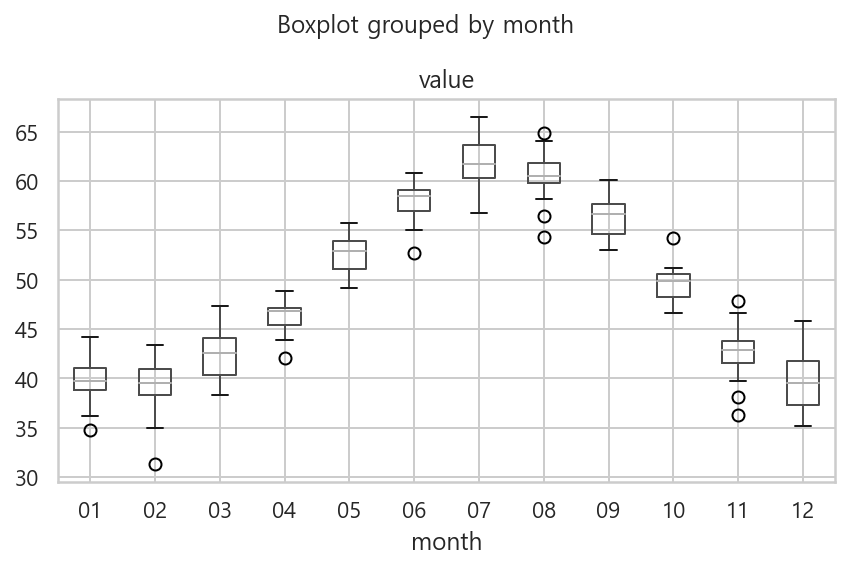

In [26]:
%matplotlib inline

plt.figure(figsize=(12, 12))
df_nottem.boxplot("value", "month")
plt.tight_layout()
plt.show() ; 

In [27]:
df_nottem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   time    240 non-null    float64 
 1   value   240 non-null    float64 
 2   month   240 non-null    category
dtypes: category(1), float64(2)
memory usage: 4.5 KB


In [32]:
print("mean : ", df_nottem.loc[df_nottem["month"]=="02"]["value"].mean())
print("std : ", df_nottem.loc[df_nottem["month"]=="02"]["value"].std())
print("median : ", df_nottem.loc[df_nottem["month"]=="02"]["value"].median())

mean :  39.190000000000005
std :  2.702221308479378
median :  39.55


In [33]:
df_nottem[df_nottem["month"]=="02"]

,time,value,month
1,1920.083333,40.8,02
13,1921.083333,39.8,02
25,1922.083333,38.7,02
37,1923.083333,40.1,02
49,1924.083333,37.5,02
61,1925.083333,40.5,02
73,1926.083333,43.4,02
85,1927.083333,38.5,02
97,1928.083333,41.1,02
109,1929.083333,31.3,02


### 7-6. 범주형 데이터의 선형회귀 분석
- OLS 클래스를 사용
- 포뮬러 식에 C(컬럼명) 입력 : 범주형 독립변수라는 의미
- 풀랭크식 : 상수항 결합을 하지 않는다. +0 입력
- 축소랭크식 : 상수항 결합을 한다. +0 입력 안함.
    - 첫번째 독립변수를 기준값하여 각월의 평균기온이 1월보다 얼마나 높은지를 나타내는 값이 회귀모형의 계수가 된다.

#### 풀랭크식 더미변수화

In [34]:
model = sm.OLS.from_formula("value ~ C(month) + 0", data=df_nottem)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.96e-125
Time:                        15:56:55   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

#### 축소랭크식 더미변수화
- 1월이 intercept가 된다.

In [35]:
model2 = sm.OLS.from_formula("value ~ C(month)", data=df_nottem)
result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.96e-125
Time:                        16:00:05   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

## 8. 보스턴 집값 데이터의 범주형 변수
- 범주형 변수 : CHAS 데이터 

### 8-1. 축소 랭크 방식
- 보스턴 집값 데이터가 상수항 결합이 되어있다면 축소 랭크 방식으로 더미변수 변환이 된 것 과 같다.
- CHAS=1인 경우와 CHAS=0인 경우의 두가지 모형을 각각 회귀분석하는 경우로 볼 수 있다.
    - CHAS=1 : $y=(w_0 + w_{CHAS}) + w_{CRIM}CRIM + w_{ZN}ZN + \cdots$
    - CHAS=0 : $y=w_0 + w_{CRIM}CRIM + w_{ZN}ZN + \cdots$    

In [36]:
from sklearn.datasets import load_boston

In [38]:
boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
model3 = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), df_boston)
result3 = model3.fit()

print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          6.72e-135
Time:                        16:33:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### 8-2. 풀랭크 방식
- 상수항 결합이 제외 된 상태 : formula 식에서 +0 추가 

In [41]:
feature_names = list(boston.feature_names)
feature_names.remove("CHAS")
feature_names = [name for name in feature_names] + ["C(CHAS)"]

model4 = sm.OLS.from_formula("MEDV ~ 0 + " + "+".join(feature_names), df_boston)
result4 = model4.fit()

print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          6.72e-135
Time:                        16:39:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    36.4595      5.103      7.144   